In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset
df = pd.read_csv('comptab_2018-01-29 16_00_comma_separated.csv')

df.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,specimens,NaN,S,W
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,DK,IS,NaN,700.0,NaN,specimens,NaN,S,W


### Missing Values Visualization

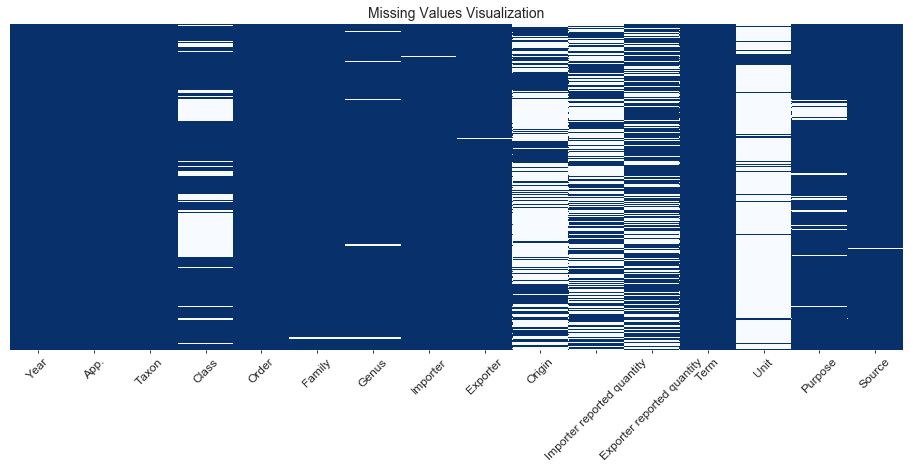

In [2]:
### Let explore how many Null values are in the Dataset
f,ax=plt.subplots(figsize= (16,6))
sns.heatmap(df.isnull(),linecolor='black',yticklabels=False, cmap='Blues_r',cbar=False,ax=ax)
kwargs = {'length':3,'color':'black','labelsize':12,'labelrotation':45}
ax.tick_params(**kwargs)
ax.set_title('Missing Values Visualization',fontsize=14)
plt.show()

The columns with some white line are missing some values. We can observe that some columns are missing a lot of values. We will drop them from the dataset and also some columns that aren't important
Here are the name of columns to drop
    1. Unit
    2. Importer reported quantity
    3. Exporter reported quantity
    4. Origin
    5. Class
    6. App.

In [3]:
# I will drop all columns that have more than 10% of null values.
col = ['Unit','Importer reported quantity','Exporter reported quantity','Origin','Class','App.']
df.drop(col,axis=1,inplace=True)
### Top 10 Trophy hunter by Country
df_th = df[df['Purpose'] == 'H']

df_th.head()

,Year,Taxon,Order,Family,Genus,Importer,Exporter,Term,Purpose,Source
151,2016,Addax nasomaculatus,Artiodactyla,Bovidae,Addax,AR,US,trophies,H,F
152,2016,Addax nasomaculatus,Artiodactyla,Bovidae,Addax,CA,US,trophies,H,F
154,2016,Addax nasomaculatus,Artiodactyla,Bovidae,Addax,FR,US,trophies,H,F
156,2016,Addax nasomaculatus,Artiodactyla,Bovidae,Addax,HU,US,trophies,H,F
157,2016,Addax nasomaculatus,Artiodactyla,Bovidae,Addax,IT,US,trophies,H,F


### Top parts of Animal used as Trophies

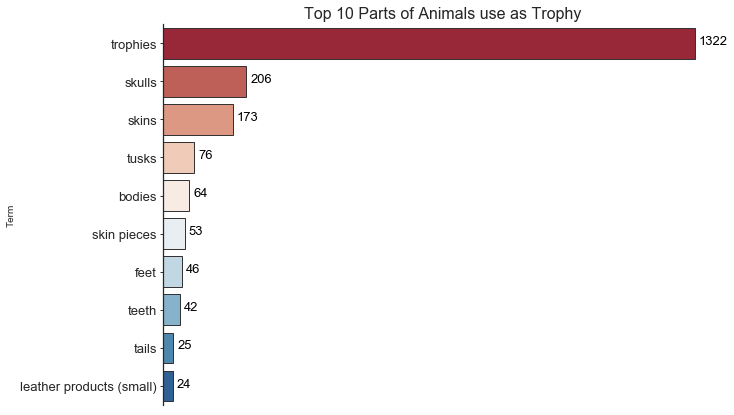

In [4]:
def trophy_count(input):    
    d_term = df_th.groupby(input).count().Source.reset_index()
    d_term.columns=['Term','Count']
    d_term.sort_values('Count',ascending=False,inplace=True)
    d_term = d_term.head(10)
    f,ax = plt.subplots(figsize=(10,7))
    sns.barplot('Count','Term',data=d_term,ax=ax,palette='RdBu',edgecolor='0.2')
    for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+10, i.get_y()+.42, \
            str(int(i.get_width())), fontsize=13,color='black')
    ax.set_title('Top 10 Parts of Animals use as Trophy',fontsize=16)
    ax.tick_params(length=3,color='black',labelsize=13)
    sns.despine(bottom=True)
    x_axis = ax.axes.get_xaxis().set_visible(False)
    return plt.show()

trophy_count('Term')

### Top 10 Countries Importer Or Exporter of Trophies

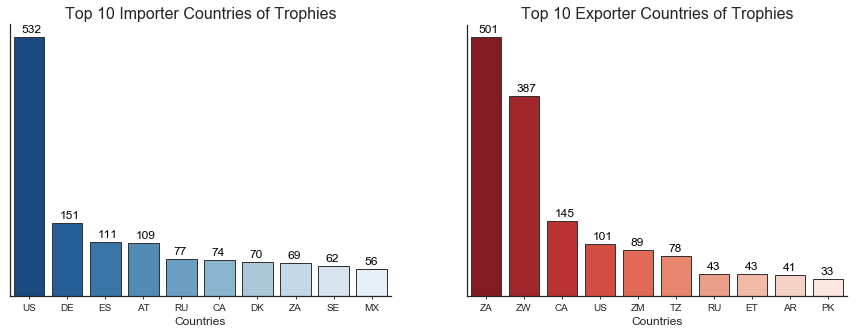

In [5]:
def trophy__ctry_count(input1,input2):    
    data_1 = df_th.groupby(input1).count().Taxon.reset_index()
    data_2 = df_th.groupby(input2).count().Taxon.reset_index()
    dataset=[data_1,data_2]
    data = []
    for i in range(len(dataset)): 
        dataset[i].columns=['colname','Count']
        dataset[i].sort_values('Count',ascending=False,inplace=True)
        co = dataset[i].head(10)
        data.append(co)
#Graph  
    f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    axes = [ax1,ax2]
    title_list = [input1,input2]
    color=['Blues_r','Reds_r']
    for k in range(len(axes)):
        sns.barplot('colname','Count',data=data[k],ax=axes[k],palette=color[k],edgecolor='0.2')
        for i in axes[k].patches:
            axes[k].text(i.get_x()+.2, i.get_height()+10, \
            str(int(i.get_height())), fontsize=12,color='black')
        axes[k].set_title('Top 10 '+title_list[k]+' Countries of Trophies',fontsize=16)
        axes[k].tick_params(length=3,color='black',labelsize=10)
        axes[k].set_xlabel('Countries',fontsize=12)
        y_axis = axes[k].axes.get_yaxis().set_visible(False)
        sns.despine()
    return plt.show()

trophy__ctry_count('Importer','Exporter')

### Where is the Source of Species Used as Trophies

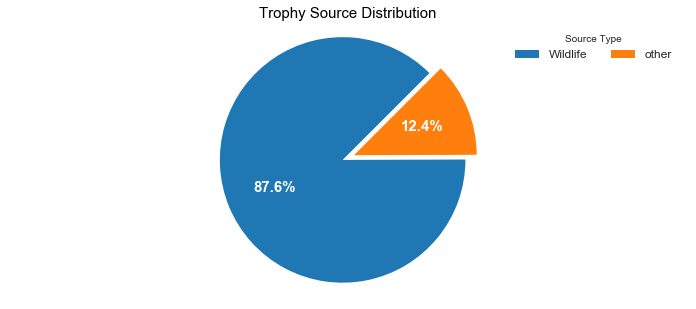

In [6]:
def source_code(input):
    if input == 'W':
        input = 'Wildlife'
    else:
        input = 'other'
    return input

df_th.Source = df_th.Source.apply(source_code)

plt.figure(figsize=(12,5))
labels = df_th.Source.value_counts().index
sizes = df_th.Source.value_counts().values
explode = (0.1,0)
plt.pie(sizes,labels=labels,explode=explode,autopct='%1.1f%%', startangle=45,rotatelabels=True,
        wedgeprops = {'linewidth': 1},textprops ={'color':'white','fontsize':15,'weight':'bold'})
plt.legend(labels,loc='best',ncol=4,fontsize=12,title ='Source Type')
plt.axis('equal')
plt.title('Trophy Source Distribution',color = 'black',fontsize =15)
plt.show()

87.6% of species used as Trophies are come from the Wildlife. While 12.4% come from other sources.
I bet all the species that come from the wildlife are ALL ANIMALS..

### What is the Top 10 most Used Species as Trophies

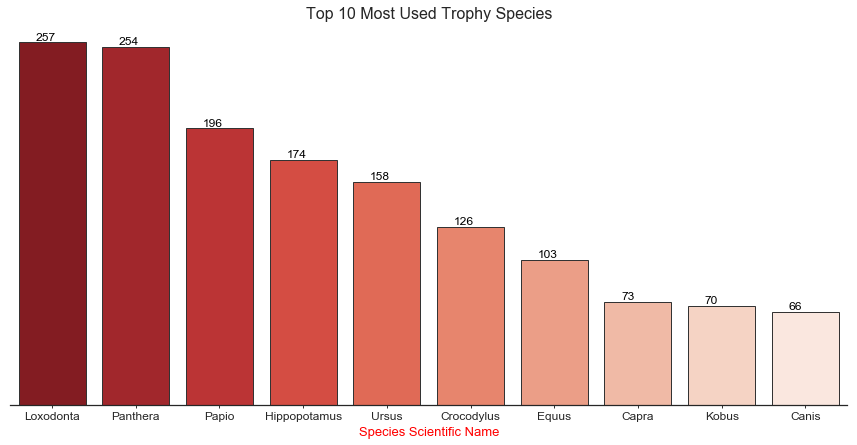

In [7]:
def count_genus(data,input):    
    d_term = data.groupby(input).count().Source.reset_index()
    d_term.columns=['Term','Count']
    d_term.sort_values('Count',ascending=False,inplace=True)
    d_term = d_term.head(10)
    f,ax = plt.subplots(figsize=(15,7))
    sns.barplot('Term','Count',data=d_term,ax=ax,palette='Reds_r',edgecolor='0.2')
    for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_x()+0.2 ,i.get_height()+2, \
            str(int(i.get_height())), fontsize=12,color='black')
    ax.set_title('Top 10 Most Used Trophy Species',fontsize=16)
    ax.tick_params(length=3,color='black',labelsize=12)
    ax.set_xlabel('Species Scientific Name',fontsize=13,color='r')
    sns.despine(left=True)
    y_axis = ax.axes.get_yaxis().set_visible(False)
    return plt.show()

count_genus(df_th,'Genus')

### How many of the top 10 imported species came to the US?

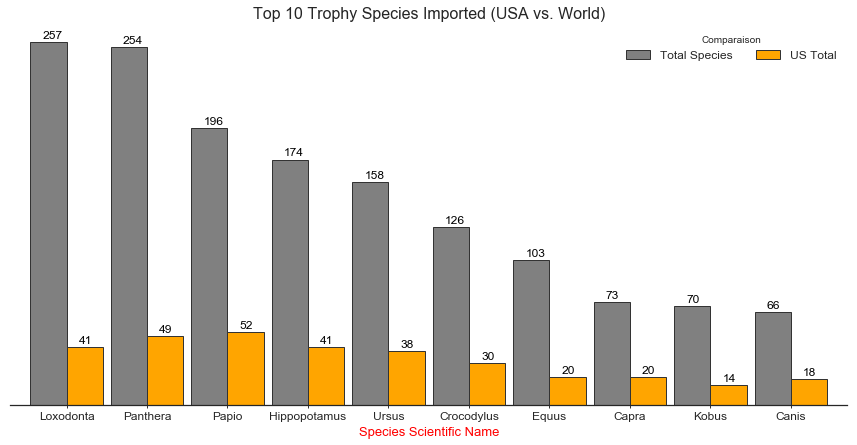

In [8]:
# Extract the top 10 species and USA as Importer from the dataset
genus_list = df_th.Genus.value_counts().head(10).index
df_th_usa = df_th[(df_th.Genus.isin(genus_list)) & (df_th.Importer=='US')]

#Create a dataframe of USA species imported in USA versus the World
genus_total = pd.DataFrame(df_th.Genus.value_counts().head(10)).reset_index()
genus_usa = pd.DataFrame(df_th_usa.Genus.value_counts().head(10)).reset_index()
genus_merge = pd.merge(genus_total,genus_usa,on='index')
genus_merge['genus_pct'] = (round((genus_merge.Genus_y/genus_merge.Genus_x)*100)).astype('int')
genus_merge.sort_values('Genus_x',ascending=False,inplace=True)
genus_merge.columns = ['Genus','Total Species','US Total','US_pct']

# Graph the comparaison
f,ax = plt.subplots(figsize=(15,7))
    #sns.barplot('index','genus_pct',data=genus_merge,ax=ax,palette='Reds_r',edgecolor='0.2')
genus_merge[['Total Species','US Total']].plot(kind='bar',ax=ax,width=0.9,ec='0.2',
                                              color=['grey','orange'])
for i in ax.patches:
    ax.text(i.get_x()+0.15 ,i.get_height()+2.8, \
            str(int(i.get_height())), fontsize=12,color='black')
ax.set_title('Top 10 Trophy Species Imported (USA vs. World)',fontsize=16)
ax.tick_params(length=3,color='black',labelsize=12)
ax.set_xticklabels(genus_merge.Genus.values.tolist(),rotation=0)
ax.set_xlabel('Species Scientific Name',fontsize=13,color='r')
sns.despine(left=True)
y_axis = ax.axes.get_yaxis().set_visible(False)
ax.legend(ncol=2,title='Comparaison',fontsize=12)
plt.show()

### what does the US Export

In [9]:
df_ex_usa = df_th[df_th.Exporter=='US']

#### Source Distribution of US Species Exported 

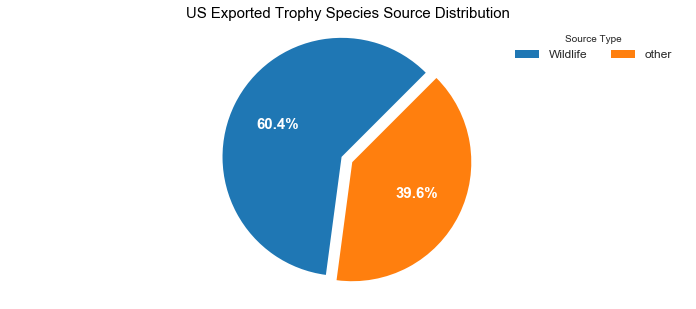

In [10]:
plt.figure(figsize=(12,5))
labels = df_ex_usa.Source.value_counts().index
sizes = df_ex_usa.Source.value_counts().values
explode = (0.1,0)
plt.pie(sizes,labels=labels,explode=explode,autopct='%1.1f%%', startangle=45,rotatelabels=True,
        wedgeprops = {'linewidth': 1},textprops ={'color':'white','fontsize':15,'weight':'bold'})
plt.legend(labels,loc='best',ncol=4,fontsize=12,title ='Source Type')
plt.axis('equal')
plt.title('US Exported Trophy Species Source Distribution',color = 'black',fontsize =15)
plt.show()

From the Chart Above, only about 60% the Species exported from the US are from the Wildlife. Among the 60%, are they wildlife ANIMALS?

### Most Exported Trophy Species From the USA

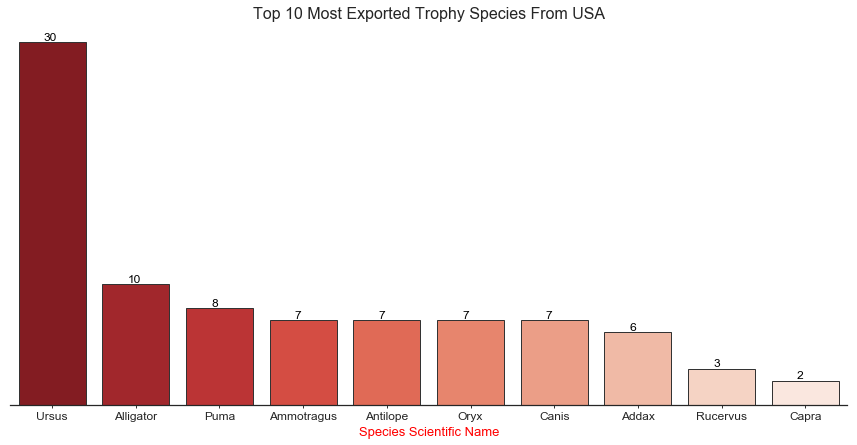

In [11]:
d_term = df_ex_usa.groupby('Genus').count().Source.reset_index()
d_term.columns=['Term','Count']
d_term.sort_values('Count',ascending=False,inplace=True)
d_term = d_term.head(10)
f,ax = plt.subplots(figsize=(15,7))
sns.barplot('Term','Count',data=d_term,ax=ax,palette='Reds_r',edgecolor='0.2')
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+0.3 ,i.get_height()+0.2, \
            str(int(i.get_height())), fontsize=12,color='black')
ax.set_title('Top 10 Most Exported Trophy Species From USA',fontsize=16)
ax.tick_params(length=3,color='black',labelsize=12)
ax.set_xlabel('Species Scientific Name',fontsize=13,color='r')
sns.despine(left=True)
y_axis = ax.axes.get_yaxis().set_visible(False)
plt.show()

### Species Exported from USA vs. Rest of the World

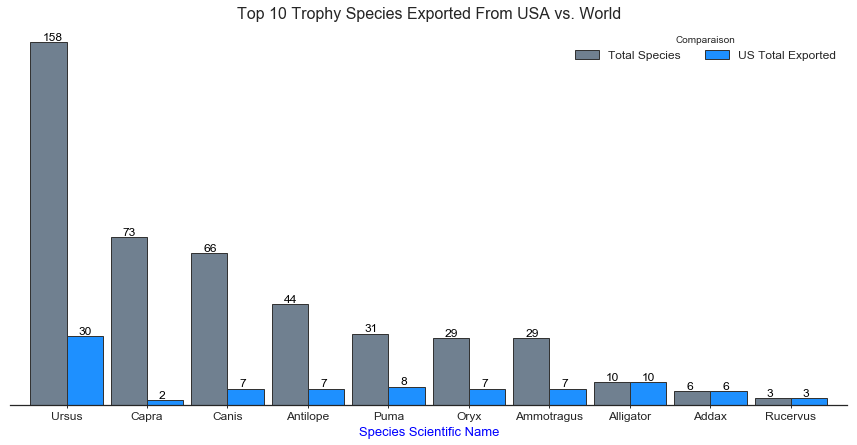

In [12]:
genus_list_2 = df_ex_usa.Genus.value_counts().head(10).index
df_th_usa_ex = df_th[(df_th.Genus.isin(genus_list_2)) & (df_th.Exporter=='US')]

genus_total_ex = pd.DataFrame(df_th.Genus.value_counts()).reset_index()
genus_usa_ex = pd.DataFrame(df_th_usa_ex.Genus.value_counts()).reset_index()
genus_merge_ex = pd.merge(genus_total_ex,genus_usa_ex,on='index',how='outer')
genus_merge_ex.dropna(inplace=True)
genus_merge_ex
#Create a dataframe of USA species imported in USA versus the World

genus_merge_ex.sort_values('Genus_x',ascending=False,inplace=True)
genus_merge_ex.columns = ['Genus','Total Species','US Total Exported']

# Graph the comparaison
f,ax = plt.subplots(figsize=(15,7))
    #sns.barplot('index','genus_pct',data=genus_merge,ax=ax,palette='Reds_r',edgecolor='0.2')
genus_merge_ex[['Total Species','US Total Exported']].plot(kind='bar',ax=ax,width=0.9,ec='0.2',
                                              color=['slategray','dodgerblue'])
for i in ax.patches:
    ax.text(i.get_x()+0.15 ,i.get_height()+1, \
            str(int(i.get_height())), fontsize=12,color='black')
ax.set_title('Top 10 Trophy Species Exported From USA vs. World',fontsize=16)
ax.tick_params(length=3,color='black',labelsize=12)
ax.set_xticklabels(genus_merge_ex.Genus.values.tolist(),rotation=0)
ax.set_xlabel('Species Scientific Name',fontsize=13,color='b')
sns.despine(left=True)
y_axis = ax.axes.get_yaxis().set_visible(False)
ax.legend(ncol=2,title='Comparaison',fontsize=12)
plt.show()

### Top 10 Countries Exporters of Trophy Species

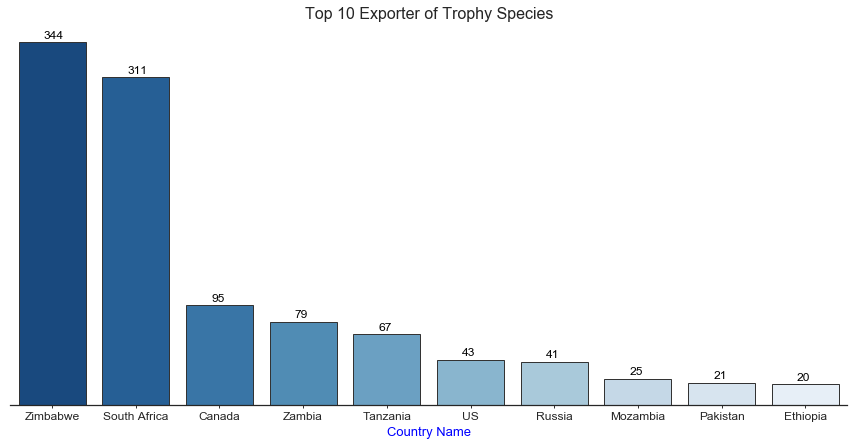

In [13]:
genus_list = df_th.Genus.value_counts().head(10).index
df_w_ex = df_th[df_th.Genus.isin(genus_list)]
new_df = pd.DataFrame(df_w_ex.Exporter.value_counts().head(10)).reset_index()
new_df.columns = ['Exporter','count']

cty_map= ({'CA':'Canada','ZA':'South Africa','ZM':'Zambia','TZ':'Tanzania','US':'US',
                            'RU':'Russia','MZ':'Mozambia','PK':'Pakistan','ET':'Ethiopia','ZW':'Zimbabwe'})
new_df.Exporter = new_df.Exporter.map(cty_map)

f,ax = plt.subplots(figsize=(15,7))
sns.barplot('Exporter','count',data=new_df,ax=ax,palette='Blues_r',edgecolor='0.2')
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+0.3 ,i.get_height()+4, \
            str(int(i.get_height())), fontsize=12,color='black')
ax.set_title('Top 10 Exporter of Trophy Species',fontsize=16)
ax.tick_params(length=3,color='black',labelsize=12)
ax.set_xlabel('Country Name',fontsize=13,color='b')
sns.despine(left=True)
y_axis = ax.axes.get_yaxis().set_visible(False)
plt.show()